TASK : Predict the onset of diabetes based on diagnostic measures

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.

Early Signs of Diabetes

* Hunger and fatigue. Your body converts the food you eat into glucose that your cells use for energy
* Peeing more often and being thirstier
* Dry mouth and itchy skin
* Blurred vision

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [38]:
data = pd.read_csv("data/diabetes.csv")  


In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
data.shape

(768, 9)

In [43]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [44]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [45]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Checking the Null Values

In [46]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [48]:
data.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Exploratory Data Analysis

In [49]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

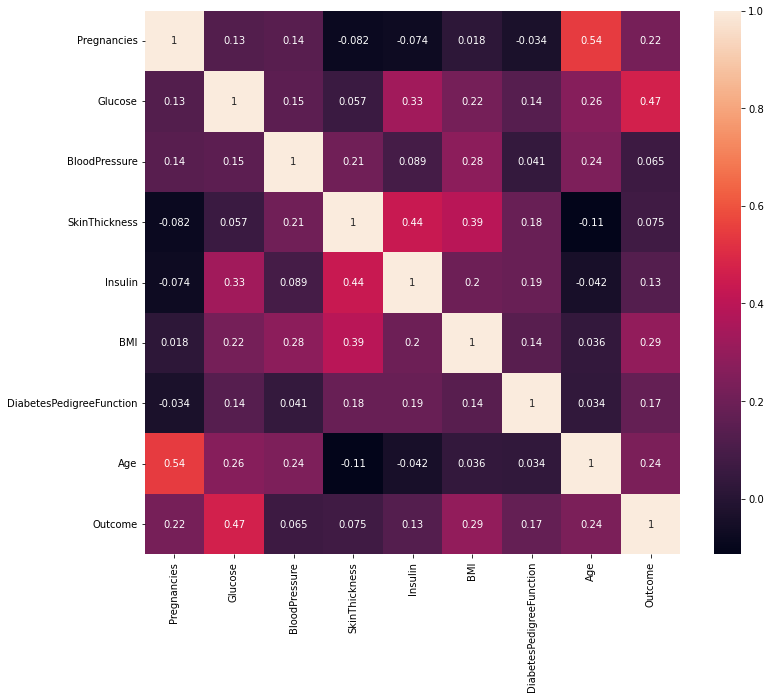

In [50]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True)

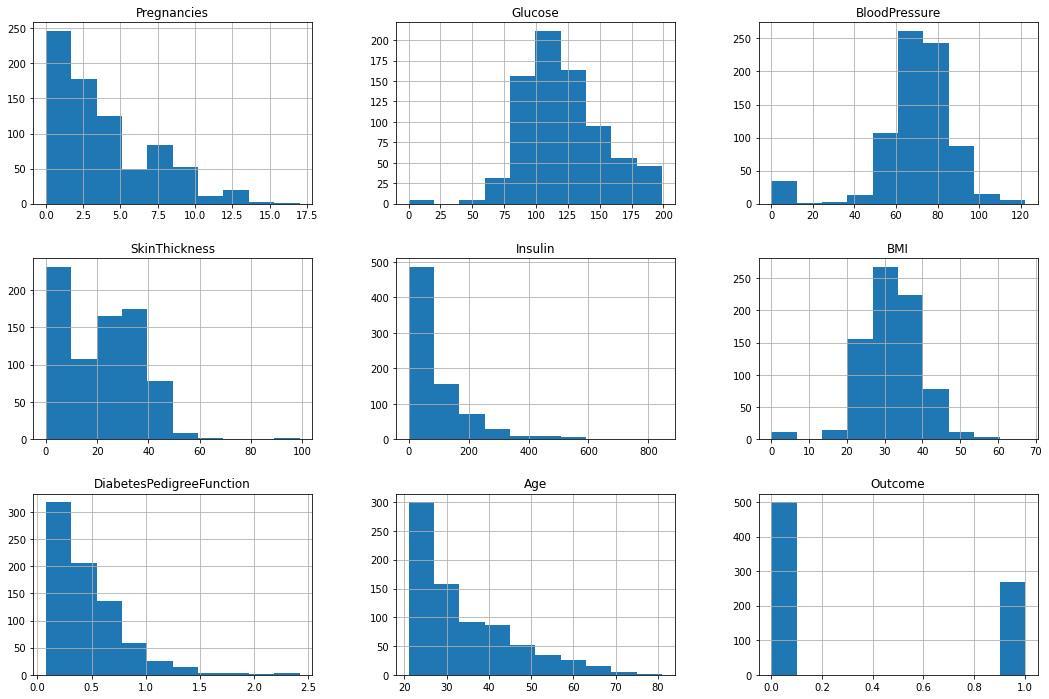

In [51]:
data.hist(figsize=(18,12))
plt.show()

<Axes: xlabel='SkinThickness'>

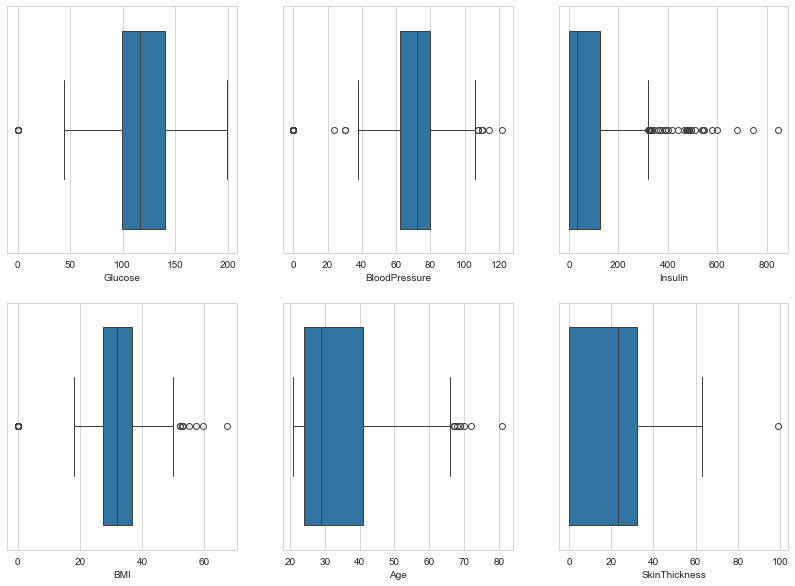

In [52]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

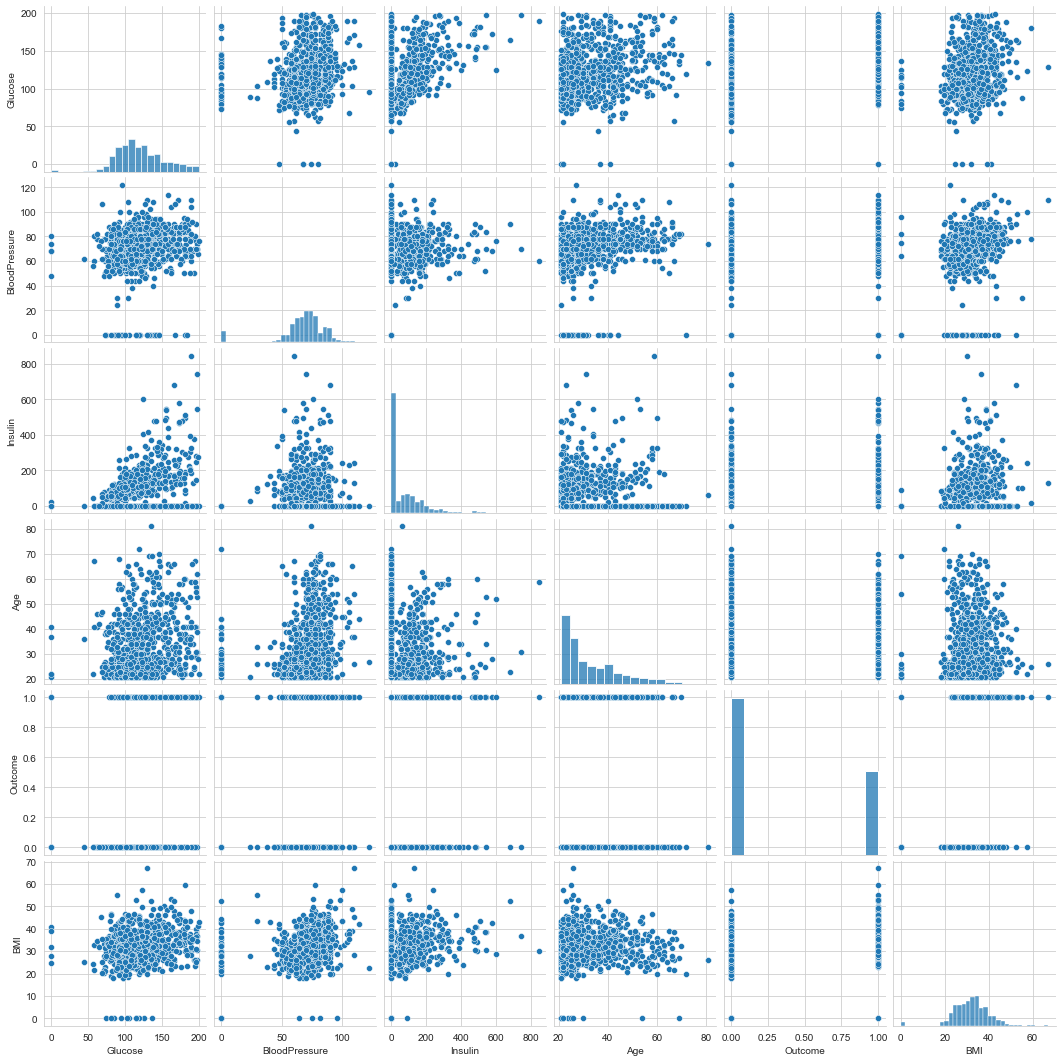

In [53]:
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']
sns.pairplot(data[mean_col],palette='Accent')

<Axes: xlabel='Outcome', ylabel='Insulin'>

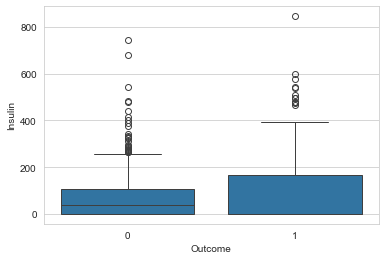

In [54]:
sns.boxplot(x='Outcome',y='Insulin',data=data)

<Axes: xlabel='BMI', ylabel='Glucose'>

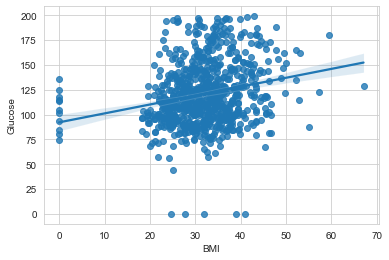

In [55]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

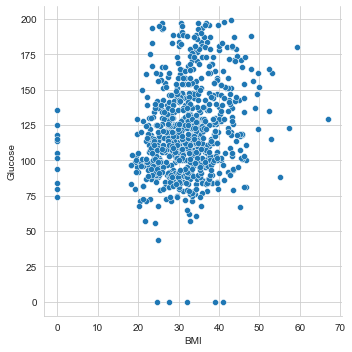

In [56]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

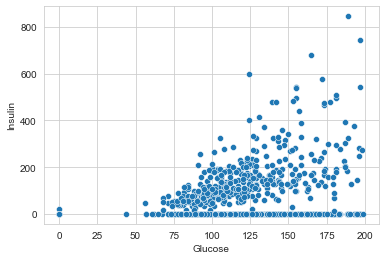

In [57]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

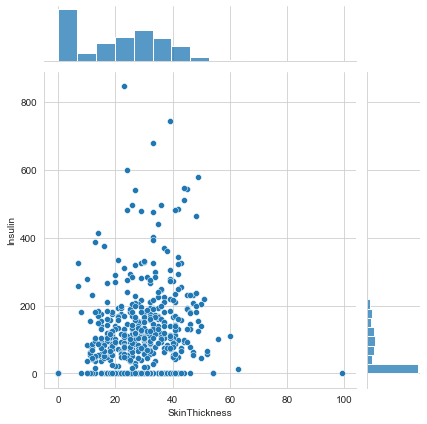

In [58]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

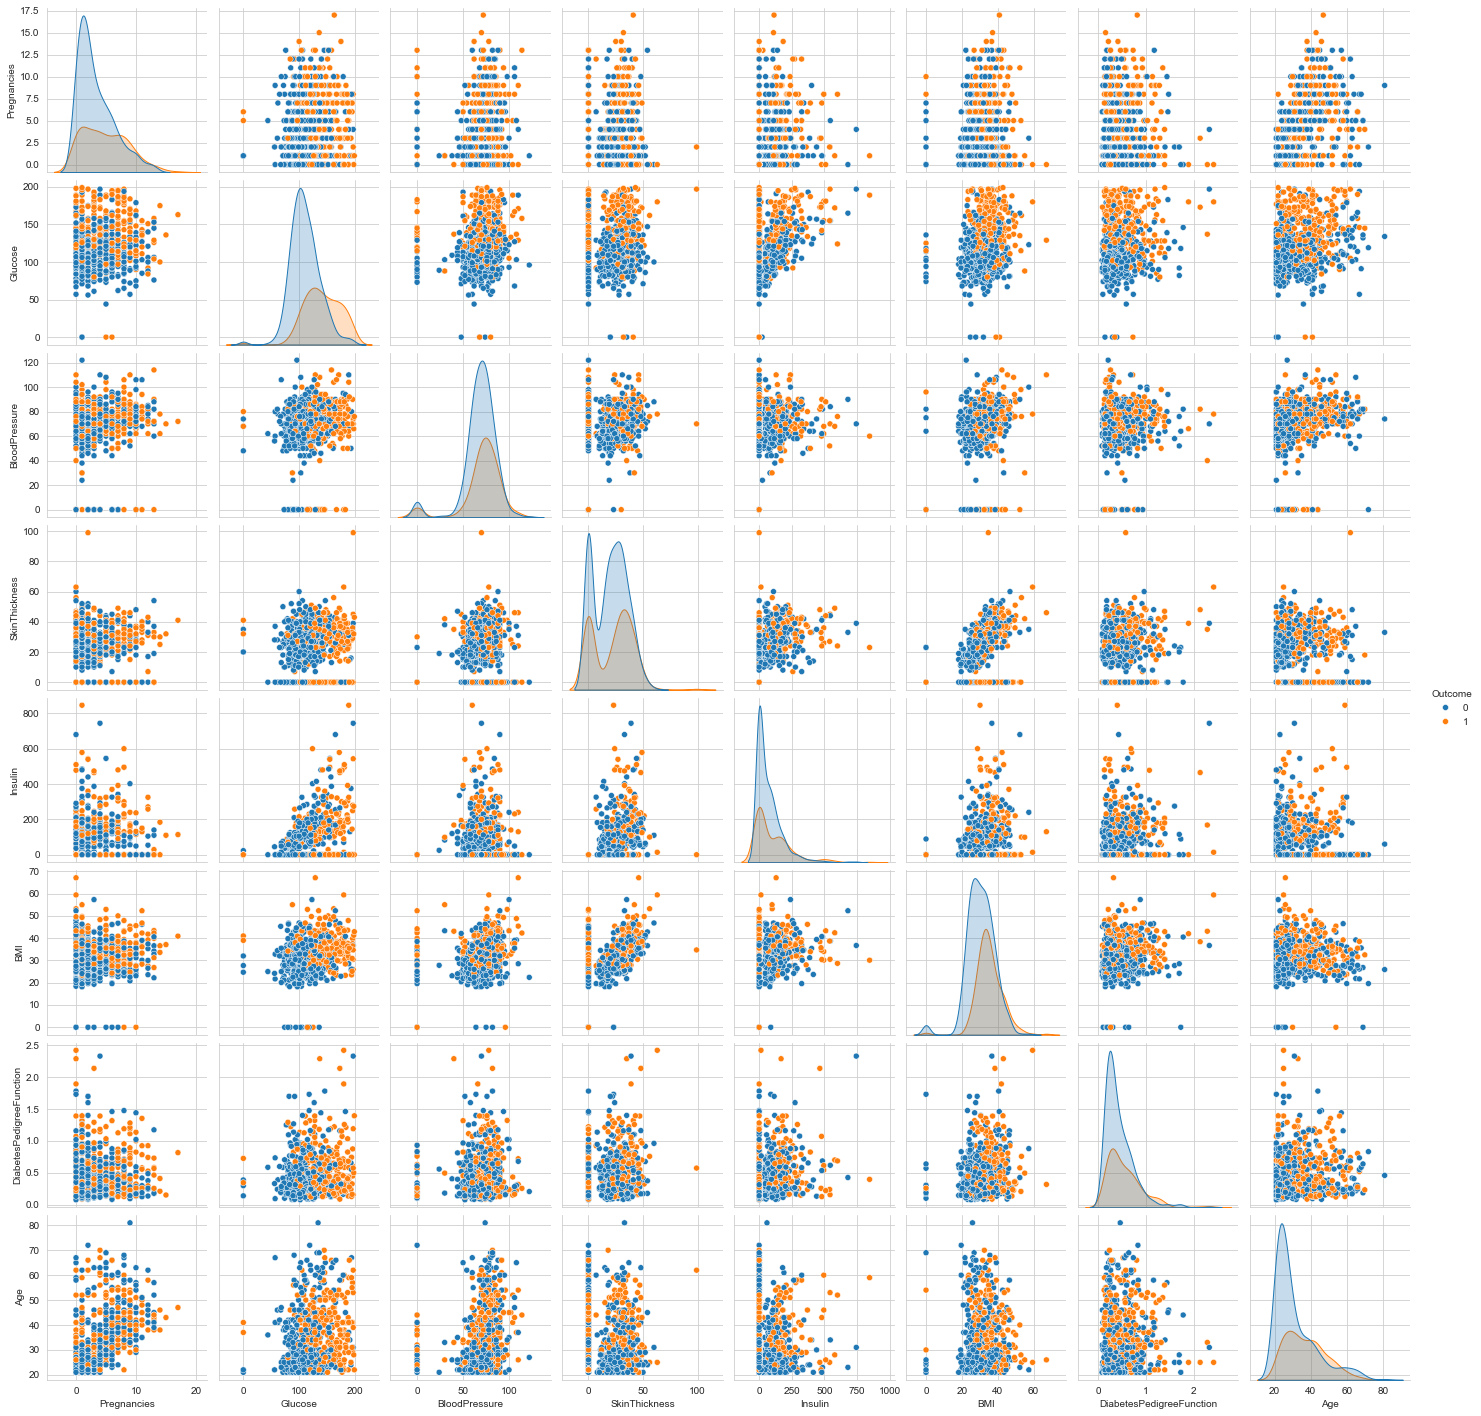

In [59]:
sns.pairplot(data,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Insulin'>

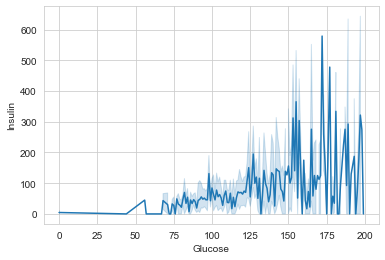

In [60]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

<Axes: xlabel='Glucose', ylabel='Insulin'>

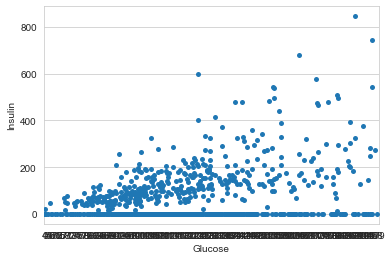

In [61]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

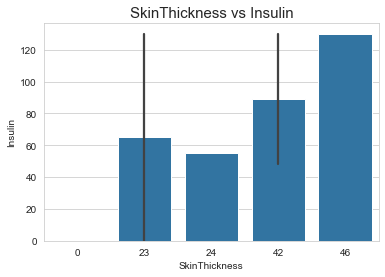

In [62]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")

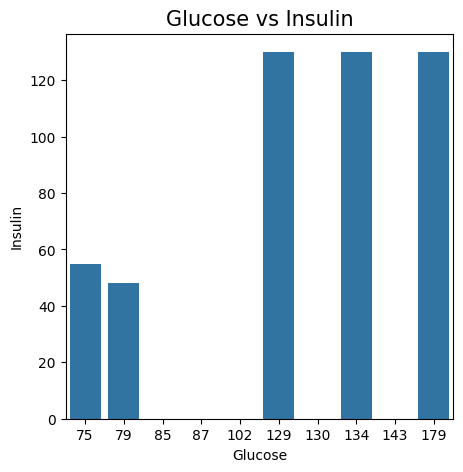

In [63]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

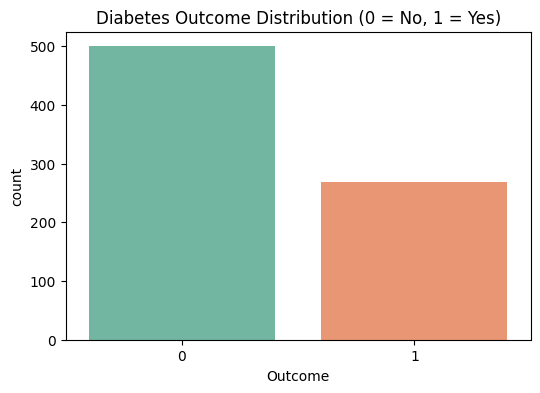

Percentage of Diabetic patients: 34.89583333333333


In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data, palette='Set2')
plt.title("Diabetes Outcome Distribution (0 = No, 1 = Yes)")
plt.show()
print("Percentage of Diabetic patients:", data['Outcome'].mean()*100)

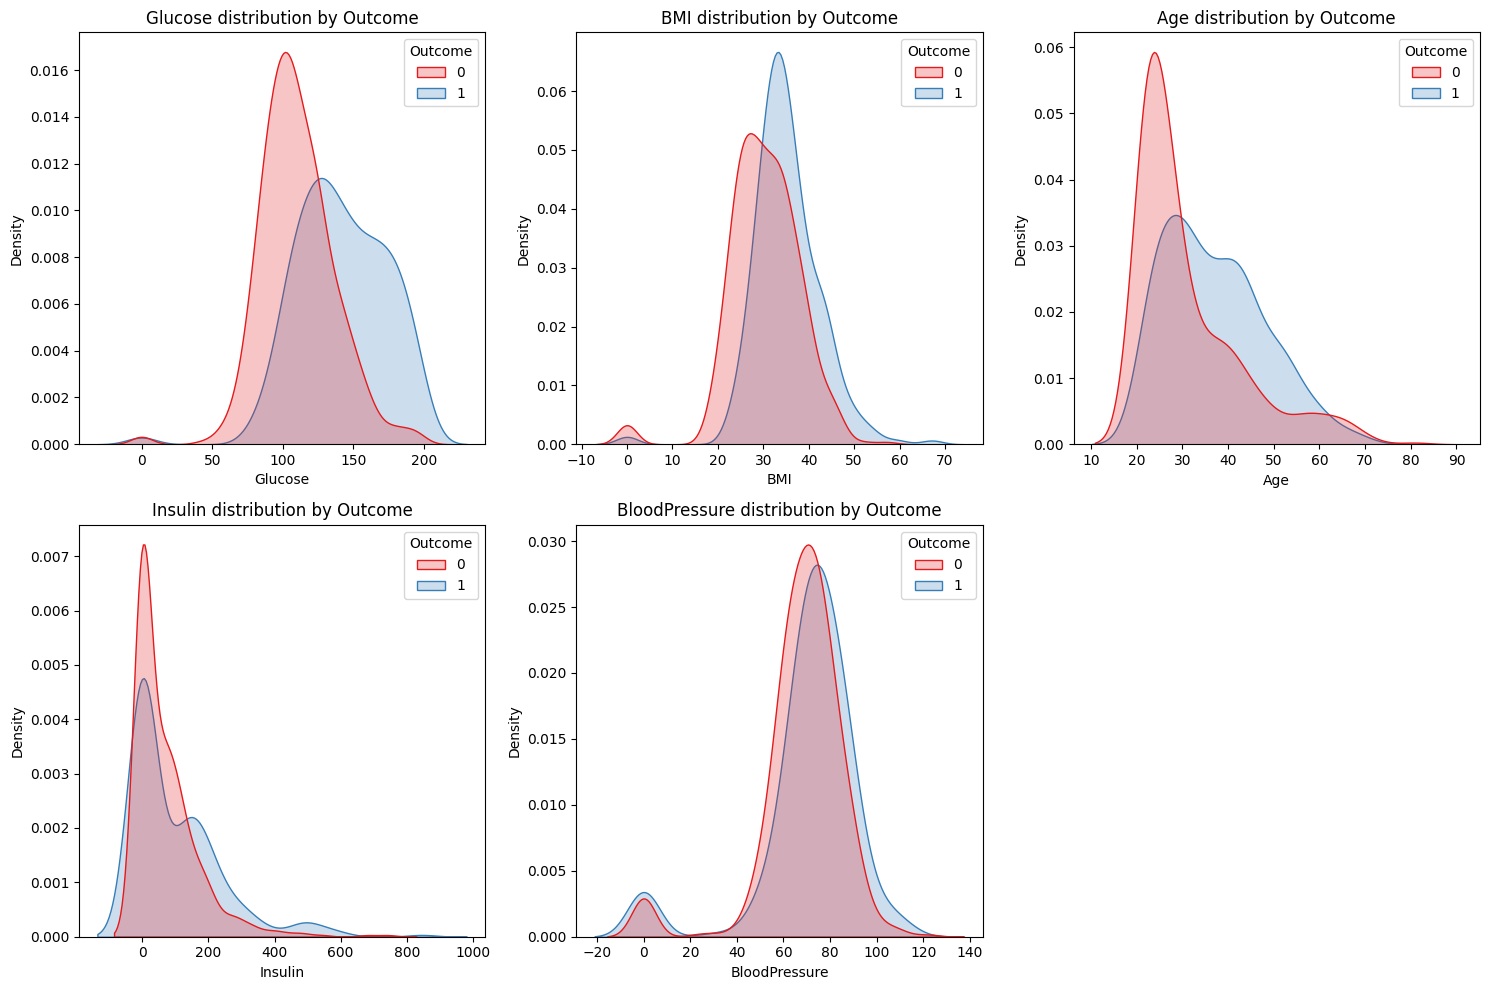

In [65]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['Glucose','BMI','Age','Insulin','BloodPressure'], 1):
    plt.subplot(2,3,i)
    sns.kdeplot(data=data, x=col, hue="Outcome", fill=True, common_norm=False, palette="Set1")
    plt.title(f"{col} distribution by Outcome")
plt.tight_layout()
plt.show()

In [66]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[invalid_cols] = data[invalid_cols].replace(0, np.nan)
print(data.isnull().sum())
for col in invalid_cols:
    data[col].fillna(data[col].median(), inplace=True)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


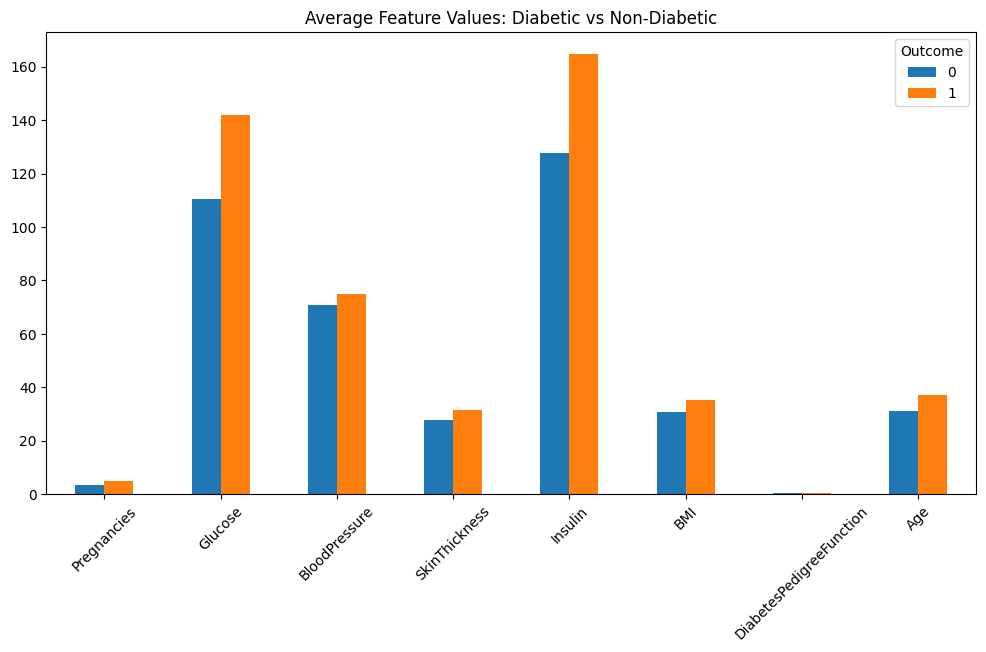

In [67]:
outcome_means = data.groupby('Outcome').mean()
outcome_means.T.plot(kind='bar', figsize=(12,6))
plt.title("Average Feature Values: Diabetic vs Non-Diabetic")
plt.xticks(rotation=45)
plt.show()

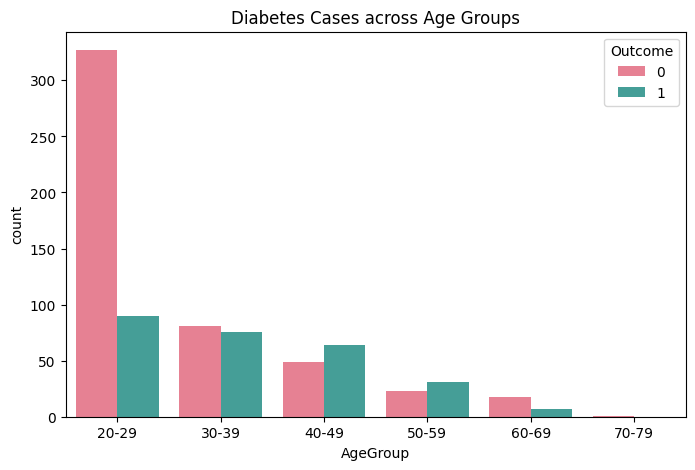

In [68]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[20,30,40,50,60,70,80], labels=['20-29','30-39','40-49','50-59','60-69','70-79'])

plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='Outcome', data=data, palette="husl")
plt.title("Diabetes Cases across Age Groups")
plt.show()

In [69]:
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 0


In [70]:
# --- Saving cleaned dataset to artifacts folder ---
data.to_csv("../artifacts/data.csv", index=False)
print("✅ Cleaned dataset saved to artifacts/data.csv successfully!")

✅ Cleaned dataset saved to artifacts/data.csv successfully!
